<a href="https://colab.research.google.com/github/enesergen/Fashion_Models/blob/main/fashion_model_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile

In [2]:
zip_ref=zipfile.ZipFile("/content/drive/MyDrive/output.zip")
zip_ref.extractall()
zip_ref.close()

['Caps' 'Dresses' 'Handbags' 'Jackets' 'Pants' 'Shirts' 'Shoes' 'Shorts'
 'Skirts' 'Sunglasses' 'Sweaters' 'Sweatshirts' 'Tshirts']
Found 19654 images belonging to 13 classes.
Found 2450 images belonging to 13 classes.
Found 2470 images belonging to 13 classes.
80134624/80134624 [==============================] - 1s 0us/step
Epoch 1/10
615/615 [==============================] - 1160s 2s/step - loss: 0.5110 - accuracy: 0.8659 - val_loss: 0.2804 - val_accuracy: 0.9335
Epoch 2/10
615/615 [==============================] - 1091s 2s/step - loss: 0.3933 - accuracy: 0.9051 - val_loss: 0.2644 - val_accuracy: 0.9429
Epoch 3/10
615/615 [==============================] - 1092s 2s/step - loss: 0.3671 - accuracy: 0.9135 - val_loss: 0.2688 - val_accuracy: 0.9494
Epoch 4/10
615/615 [==============================] - 1083s 2s/step - loss: 0.3590 - accuracy: 0.9187 - val_loss: 0.2794 - val_accuracy: 0.9429
Epoch 5/10
615/615 [==============================] - 1079s 2s/step - loss: 0.3623 - accuracy: 0.

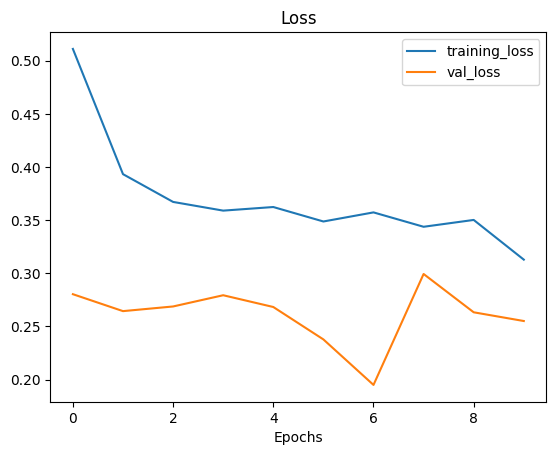

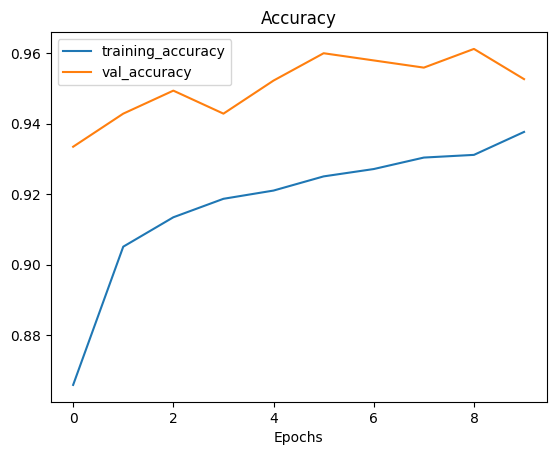

In [5]:
import os 
import pathlib 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# must be controlled whether the path is correct or not
train_dir="./output/train/"
test_dir="./output/test/"
val_dir="./output/val/"

data_dir=pathlib.Path(train_dir)
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

train_datagen_augmented=ImageDataGenerator(rescale=1/255.,
                                           rotation_range=20,
                                           width_shift_range=0.2,
                                           height_shift_range=0.2,
                                           zoom_range=0.3,
                                           horizontal_flip=True)

train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,
                                                                 target_size=(224,224),
                                                                 batch_size=32,
                                                                 class_mode="categorical")
val_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)
val_data=val_datagen.flow_from_directory(val_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")
test_data=test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")

tf.random.set_seed(42)

base_model = VGG19(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

for layer in base_model.layers:
  layer.trainable = False

model_6=Sequential([
    base_model,
    Flatten(),
    Dense(13, activation="softmax")
])

model_6.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_6=model_6.fit(train_data_augmented,
                      epochs=10,
                      steps_per_epoch=len(train_data_augmented),
                      validation_data=val_data,
                      validation_steps=len(val_data))

model_6.evaluate(test_data)

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

plot_loss_curves(history_6)

model_6.save("Model_6")

model_6.save("Model_6_h5.h5")






In [6]:
!zip -r /content/Model_6 /content/Model_6
from google.colab import files
files.download("/content/Model_6.zip")

  adding: content/Model_6/ (stored 0%)
  adding: content/Model_6/saved_model.pb (deflated 91%)
  adding: content/Model_6/fingerprint.pb (stored 0%)
  adding: content/Model_6/assets/ (stored 0%)
  adding: content/Model_6/keras_metadata.pb (deflated 96%)
  adding: content/Model_6/variables/ (stored 0%)
  adding: content/Model_6/variables/variables.index (deflated 65%)
  adding: content/Model_6/variables/variables.data-00000-of-00001 (deflated 7%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>